In [1]:
import numpy as np
import pandas as pd
import yfinance
import pandas_ta as ta

# Data
- Open
- High
- Low
- Close
- Volume
- tbill - 13
- tbond - 10
- tbond - 30
- crude oil
- gold
- fx cad
- fx jpy
- fx eur
- fx cny

In [2]:
ticker = 'MSFT'
start = '2004-01-02'
end = {
    'AAPL': '2021-09-21',
    'MSFT': '2020-09-29',
    'AMZN': '2020-09-29',
    'SPY': "2023-02-20"
}
def get_yfdata(yf_ticker, cols):
    yf_data = yfinance.download(yf_ticker, start = start, end=end[ticker])
    yf_data = yf_data.rename(columns={'Open':'open', 'High': 'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})
    yf_data.drop(columns=['Adj Close'])
    print(yf_ticker, yf_data.shape)
    return yf_data[cols]

In [3]:
df = get_yfdata(ticker, ['open', 'high', 'low', 'close','volume'])
close_cols = ['^IRX','^TNX', '^TYX', 'CL=F', 'GC=F', 'CAD=X', 'JPY=X', 'EUR=X', 'CNY=X']
for col in close_cols:
    df = df.join(get_yfdata(col,'close').rename(col), how='outer')
df.head()

[*********************100%***********************]  1 of 1 completed
MSFT (4214, 6)
[*********************100%***********************]  1 of 1 completed
^IRX (4208, 6)
[*********************100%***********************]  1 of 1 completed
^TNX (4208, 6)
[*********************100%***********************]  1 of 1 completed
^TYX (4208, 6)
[*********************100%***********************]  1 of 1 completed
CL=F (4208, 6)
[*********************100%***********************]  1 of 1 completed
GC=F (4204, 6)
[*********************100%***********************]  1 of 1 completed
CAD=X (4353, 6)
[*********************100%***********************]  1 of 1 completed
JPY=X (4338, 6)
[*********************100%***********************]  1 of 1 completed
EUR=X (4338, 6)
[*********************100%***********************]  1 of 1 completed
CNY=X (4352, 6)


open       high        low      close      volume   ^IRX  \
Date                                                                        
2004-01-02  27.580000  27.770000  27.330000  27.450001  44487700.0  0.902   
2004-01-05  27.730000  28.180000  27.719999  28.139999  67333700.0  0.902   
2004-01-06  28.190001  28.280001  28.070000  28.240000  46950800.0  0.901   
2004-01-07  28.170000  28.309999  28.010000  28.209999  54298200.0  0.886   
2004-01-08  28.389999  28.480000  28.000000  28.160000  58810800.0  0.847   

             ^TNX   ^TYX       CL=F        GC=F   CAD=X       JPY=X    EUR=X  \
Date                                                                           
2004-01-02  4.373  5.176        NaN         NaN  1.2925  106.910004  0.79479   
2004-01-05  4.387  5.175  33.779999  424.399994  1.2812  106.239998  0.78821   
2004-01-06  4.277  5.106  33.700001  422.799988  1.2866  106.230003  0.78610   
2004-01-07  4.246  5.084  33.619999  421.899994  1.2895  106.180000  0.79108   
2004-01-08  4.249  5.080  33.980000  424.000000  1.2787  106.169998  0.78278   

               CNY=X  
Date                  
2004-01-02  8.266900  
2004-01-05  8.267000  
2004-01-06  8.267100  
2004-01-07  8.267201  
2004-01-08  8.267201

In [4]:
df.isna().sum()

open      153
high      153
low       153
close     153
volume    153
^IRX      159
^TNX      159
^TYX      159
CL=F      159
GC=F      163
CAD=X      14
JPY=X      29
EUR=X      29
CNY=X      15
dtype: int64

In [5]:
# preprocessing
df['!close_pct'] = df['close'].pct_change()
df['!open'] = df['open']
df['!close'] = df['close']
df['!high'] = df['high']
df['!low'] = df['low']
from scipy.stats.mstats import gmean
for col in df.columns:
    if '!' not in col:
        df[col] = df[col].pct_change()
        df[col] = df[col].apply(lambda x: x+1).rolling(window=5, min_periods=1).apply(gmean).apply(lambda x: x-1)
df = df.dropna()
print(df.shape)
df.head()

(4192, 19)


open      high       low     close    volume      ^IRX  \
Date                                                                     
2004-01-12 -0.000433 -0.003214 -0.002684 -0.004084 -0.036724 -0.012504   
2004-01-13 -0.004582 -0.004568 -0.005839 -0.005804  0.018889 -0.008811   
2004-01-14 -0.004658 -0.004131 -0.003886 -0.003642 -0.041594 -0.006402   
2004-01-15 -0.005989 -0.005395 -0.004178 -0.004443 -0.001045  0.001178   
2004-01-16 -0.002294 -0.001286 -0.000435  0.001082 -0.009408  0.004706   

                ^TNX      ^TYX      CL=F      GC=F     CAD=X     JPY=X  \
Date                                                                     
2004-01-12 -0.014260 -0.008011  0.005505  0.000894 -0.000797  0.000677   
2004-01-13 -0.011925 -0.006588  0.004295  0.000425 -0.002437  0.000019   
2004-01-14 -0.012558 -0.008076  0.005181 -0.000095  0.000000  0.000113   
2004-01-15 -0.013442 -0.008775 -0.003199 -0.007469  0.002660  0.000188   
2004-01-16 -0.003549 -0.003610  0.004391 -0.009416  0.003849  0.000319   

               EUR=X     CNY=X  !close_pct      !open     !close      !high  \
Date                                                                          
2004-01-12 -0.000849  0.000000   -0.003254  27.670000  27.570000  27.730000   
2004-01-13 -0.001017 -0.000007   -0.005078  27.549999  27.430000  27.639999   
2004-01-14 -0.000159 -0.000010    0.009843  27.520000  27.700001  27.730000   
2004-01-15  0.002747 -0.000012   -0.005776  27.549999  27.540001  27.719999   
2004-01-16  0.007327 -0.000007    0.009804  27.709999  27.809999  27.879999   

                 !low  
Date                   
2004-01-12  27.350000  
2004-01-13  27.260000  
2004-01-14  27.469999  
2004-01-15  27.420000  
2004-01-16  27.530001

In [6]:
df.tail()

open      high       low     close    volume      ^IRX  \
Date                                                                     
2020-09-22 -0.003245 -0.001607 -0.004732 -0.001306  0.089599 -0.025243   
2020-09-23 -0.002596 -0.002433 -0.004547 -0.004389  0.031898 -0.025243   
2020-09-24 -0.000200  0.001211 -0.000761  0.000276 -0.017091  0.018152   
2020-09-25  0.000739  0.005238  0.006330  0.007308 -0.118237  0.016326   
2020-09-28  0.013515  0.009544  0.011622  0.006722 -0.042850  0.019245   

                ^TNX      ^TYX      CL=F      GC=F     CAD=X     JPY=X  \
Date                                                                     
2020-09-22 -0.004458 -0.002527  0.006803 -0.005970  0.001865 -0.001947   
2020-09-23 -0.003223 -0.003059 -0.001148 -0.010450  0.001575 -0.000659   
2020-09-24 -0.005319 -0.003950 -0.003243 -0.007504  0.003046  0.000460   
2020-09-25 -0.010296 -0.006696 -0.004219 -0.009864  0.003041  0.001404   
2020-09-28 -0.002396 -0.000561  0.006479 -0.003006  0.002737  0.001976   

               EUR=X     CNY=X  !close_pct       !open      !close  \
Date                                                                 
2020-09-22  0.001728 -0.000159    0.024094  205.059998  207.419998   
2020-09-23  0.002313 -0.000056   -0.032928  207.899994  200.589996   
2020-09-24  0.002474  0.001629    0.012962  199.850006  203.190002   
2020-09-25  0.002980  0.001873    0.022787  203.550003  207.820007   
2020-09-28  0.003587  0.001614    0.007795  210.880005  209.440002   

                 !high        !low  
Date                                
2020-09-22  208.100006  202.080002  
2020-09-23  208.100006  200.029999  
2020-09-24  205.570007  199.199997  
2020-09-25  209.039993  202.539993  
2020-09-28  212.570007  208.059998

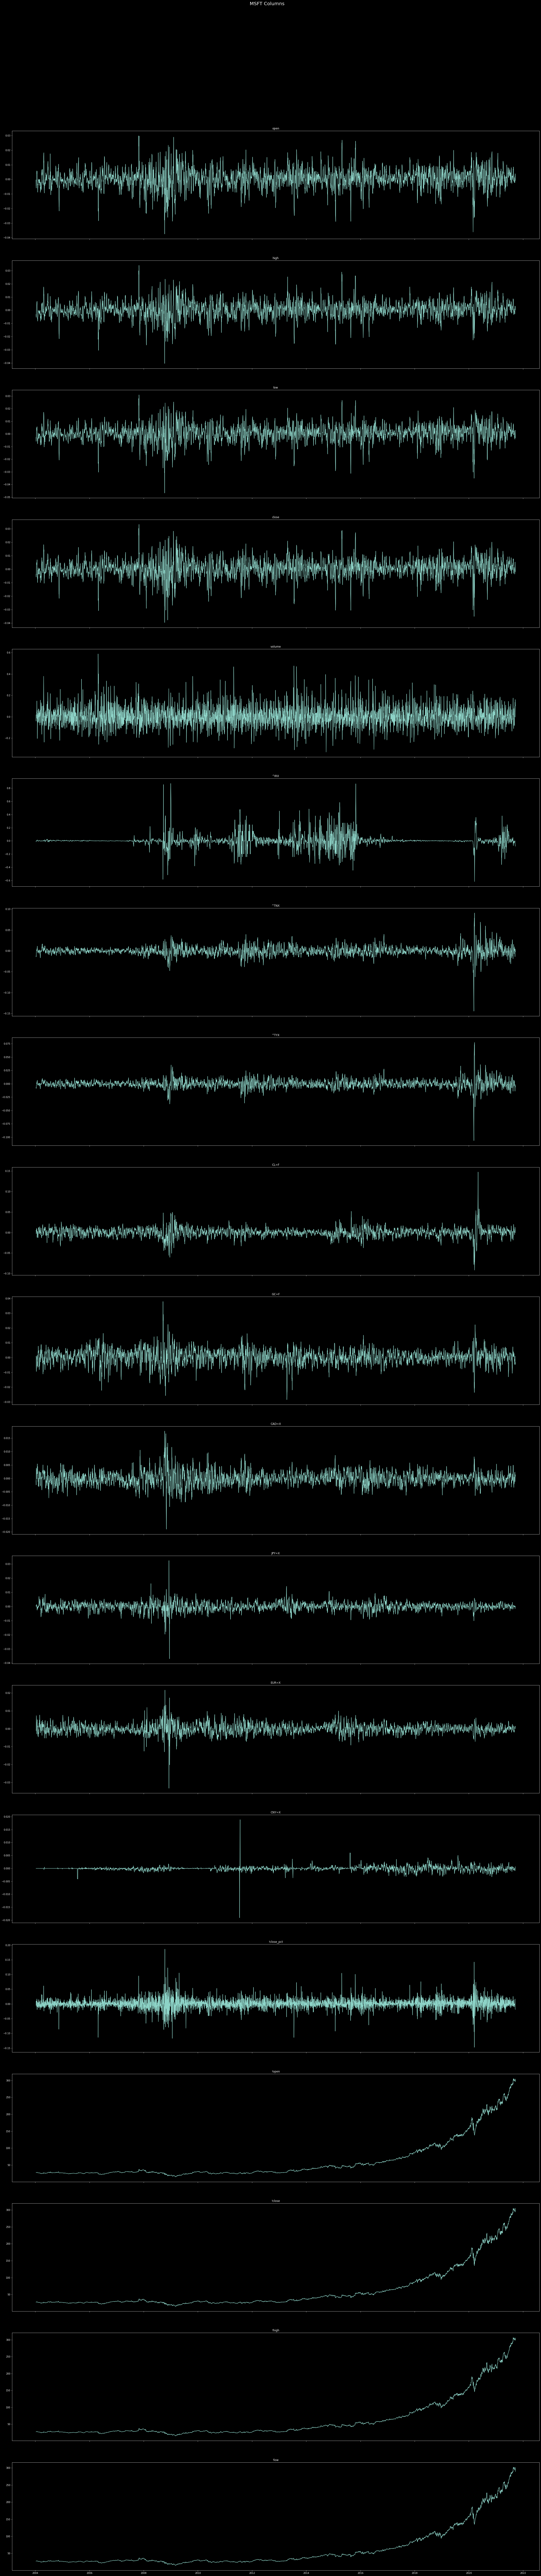

In [83]:
from utils.plot_utils import *
plot_cols(df, ticker)

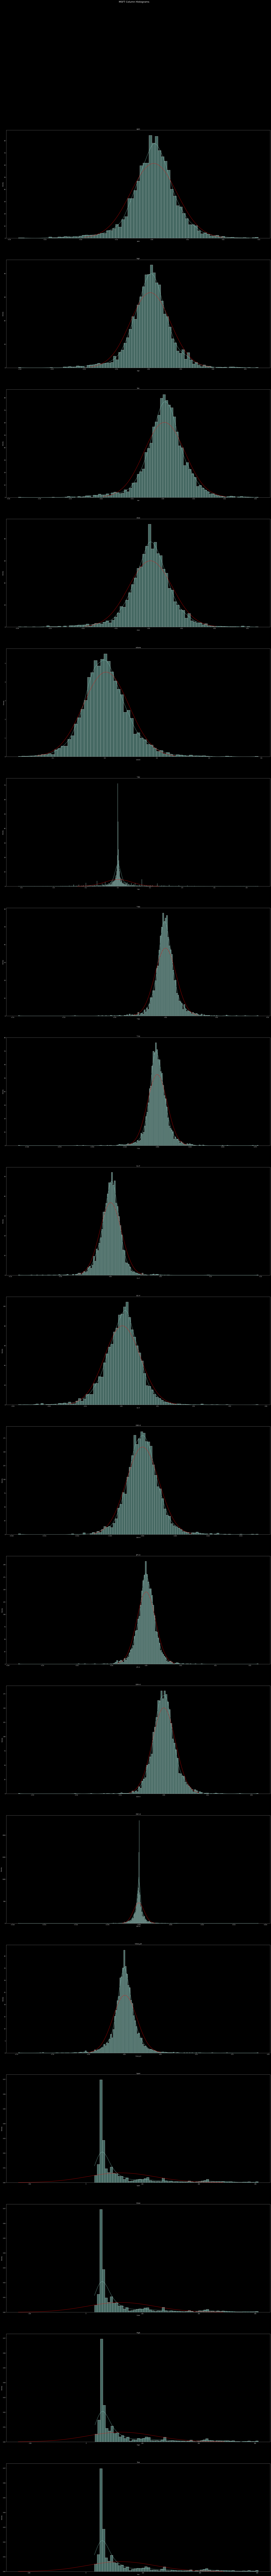

In [84]:
plot_col_histogram(df, ticker)

In [7]:
df_train = df.iloc[:int(0.8*df.shape[0]),:]
df_val = df.iloc[int(0.8*df.shape[0]):int(0.9*df.shape[0]),:]
df_test = df.iloc[int(0.9*df.shape[0]):,:]
df_train.shape

(3353, 19)

In [8]:
def get_outliers(df, gaus_cols, iqr_mult = 1.5, replace = False):
    df = df.copy()
    outlier = df.iloc[:,0].apply(lambda x: False)
    print(df.shape)
    for col in df.columns:
        if col in gaus_cols:
            q1, q3 = np.percentile(df[col],[25,75])
            upper_bound = q3 + iqr_mult*(q3-q1)
            lower_bound = q1 - iqr_mult*(q3-q1)

            high_out = df[col] > upper_bound
            low_out = df[col] < lower_bound
            col_out = high_out | low_out
            print(f'{col}: {(lower_bound, upper_bound)} High Outliers = {high_out.sum()}, Low Outliers = {low_out.sum()}, Total Outliers = {col_out.sum()}')

            if replace:
                df[col] = np.where(high_out, upper_bound, df[col])
                df[col] = np.where(low_out, lower_bound, df[col])
            
            outlier |= col_out
    print(f'Total Outliers: {outlier.sum()}')
    print(df[~outlier].shape)
    return df, outlier

In [9]:
X_cols = [col for col in df.columns if '!' not in col and col!='^IRX']
df_train_fixed, outliers = get_outliers(df_train, X_cols, iqr_mult=3, replace=True)

(3353, 19)
open: (-0.024055954204182273, 0.024778493310433358) High Outliers = 9, Low Outliers = 12, Total Outliers = 21
high: (-0.02363109218459636, 0.024194677196126668) High Outliers = 13, Low Outliers = 14, Total Outliers = 27
low: (-0.023485597561462512, 0.024340202303247294) High Outliers = 11, Low Outliers = 21, Total Outliers = 32
close: (-0.024654164373063336, 0.025344610404097523) High Outliers = 10, Low Outliers = 16, Total Outliers = 26
volume: (-0.3621367681771308, 0.36563512061611114) High Outliers = 10, Low Outliers = 0, Total Outliers = 10
^TNX: (-0.03489681108795528, 0.034509611860837786) High Outliers = 7, Low Outliers = 9, Total Outliers = 16
^TYX: (-0.025931641702459984, 0.025649057658398422) High Outliers = 7, Low Outliers = 12, Total Outliers = 19
CL=F: (-0.039959381386580395, 0.04018267310832935) High Outliers = 10, Low Outliers = 8, Total Outliers = 18
GC=F: (-0.02216881584406316, 0.023000556387560822) High Outliers = 4, Low Outliers = 7, Total Outliers = 11
CAD

In [ ]:
plot_col_histogram(df_train[~outliers][X_cols], ticker)

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
def standardize_and_scale(df_train, df_train_fixed, df_val, df_test, outliers):
    scalers = {}
    df_train_norm = pd.DataFrame()
    df_val_norm = pd.DataFrame()
    df_test_norm = pd.DataFrame()
    for i, col in enumerate(df_train.columns):
        
        if 'Y_' not in col and '!' not in col:
            scaler = RobustScaler()
            scaler = scaler.fit(np.array(df_train[col]).reshape(-1,1))
            df_train_norm[col] = pd.Series(np.squeeze(scaler.transform(np.array(df_train[col]).reshape(-1,1))), index=df_train.index)
            df_val_norm[col] = pd.Series(np.squeeze(scaler.transform(np.array(df_val[col]).reshape(-1,1))), index=df_val.index)
            df_test_norm[col] = pd.Series(np.squeeze(scaler.transform(np.array(df_test[col]).reshape(-1,1))), index=df_test.index)
            scalers[col] = scaler
    
        else:
            df_train_norm[col] = df_train[col]
            df_val_norm[col] = df_val[col]
            df_test_norm[col] = df_test[col]

    print(scalers)
    return df_train_norm, df_val_norm, df_test_norm, scalers

In [11]:
df_train_norm, df_val_norm, df_test_norm, scalers = standardize_and_scale(df_train, df_train, df_val, df_test, outliers)
df_train_norm.head()

{'open': RobustScaler(), 'high': RobustScaler(), 'low': RobustScaler(), 'close': RobustScaler(), 'volume': RobustScaler(), '^IRX': RobustScaler(), '^TNX': RobustScaler(), '^TYX': RobustScaler(), 'CL=F': RobustScaler(), 'GC=F': RobustScaler(), 'CAD=X': RobustScaler(), 'JPY=X': RobustScaler(), 'EUR=X': RobustScaler(), 'CNY=X': RobustScaler()}


open      high       low     close    volume      ^IRX  \
Date                                                                     
2004-01-12 -0.120153 -0.528388 -0.452582 -0.629141 -0.342062 -0.466469   
2004-01-13 -0.714922 -0.726471 -0.914386 -0.869823  0.192851 -0.329493   
2004-01-14 -0.725758 -0.662623 -0.628504 -0.567227 -0.388900 -0.240142   
2004-01-15 -0.916525 -0.847553 -0.671207 -0.679305  0.001112  0.041001   
2004-01-16 -0.386863 -0.246184 -0.123467  0.094207 -0.079321  0.171866   

                ^TNX      ^TYX      CL=F      GC=F     CAD=X     JPY=X  \
Date                                                                     
2004-01-12 -1.392773 -1.033310  0.435246  0.041484 -0.245584  0.199751   
2004-01-13 -1.157240 -0.840195  0.329627 -0.031105 -0.763366  0.001314   
2004-01-14 -1.221140 -1.042063  0.406992 -0.111722  0.006259  0.029714   
2004-01-15 -1.310265 -1.136896 -0.324938 -1.254553  0.846490  0.052429   
2004-01-16 -0.312540 -0.435947  0.338026 -1.556215  1.221802  0.091786   

               EUR=X     CNY=X  !close_pct      !open     !close      !high  \
Date                                                                          
2004-01-12 -0.248704  0.017336   -0.003254  27.670000  27.570000  27.730000   
2004-01-13 -0.298955 -0.003062   -0.005078  27.549999  27.430000  27.639999   
2004-01-14 -0.042794 -0.009926    0.009843  27.520000  27.700001  27.730000   
2004-01-15  0.824984 -0.016726   -0.005776  27.549999  27.540001  27.719999   
2004-01-16  2.192587 -0.003063    0.009804  27.709999  27.809999  27.879999   

                 !low  
Date                   
2004-01-12  27.350000  
2004-01-13  27.260000  
2004-01-14  27.469999  
2004-01-15  27.420000  
2004-01-16  27.530001

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def add_PCA(PCA_col, df_train_pca, df_val_pca, df_test_pca, n_components = None, prefix = '', append = False):
    PCA_df = df_train_pca[PCA_col]
    print(df_train_pca.shape)
    print(PCA_df.shape, PCA_df.columns)

    if n_components is None:
        n_components = len(PCA_col)
    pca = PCA(n_components=n_components).fit(PCA_df)
    PCA_df = pca.transform(PCA_df)
    print(PCA_df.shape)
    print(pca.explained_variance_ratio_)
    plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
    plt.show()

    if append:
        for c in range(n_components):
            imp = '*' if pca.explained_variance_ratio_[c] > 0.01 else ''
            df_train_pca[f'{prefix}pca{imp}_{c}'] = pca.transform(df_train_pca[PCA_col])[:,c]
            df_val_pca[f'{prefix}pca{imp}_{c}'] = pca.transform(df_val_pca[PCA_col])[:,c]
            df_test_pca[f'{prefix}pca{imp}_{c}'] = pca.transform(df_test_pca[PCA_col])[:,c]
        return df_train_pca, df_val_pca, df_test_pca

(3353, 19)
(3353, 9) Index(['^IRX', '^TNX', '^TYX', 'CL=F', 'GC=F', 'CAD=X', 'JPY=X', 'EUR=X',
       'CNY=X'],
      dtype='object')
(3353, 9)
[0.55280073 0.2056465  0.0877697  0.06503903 0.02829851 0.02448409
 0.01810122 0.01556759 0.00229265]


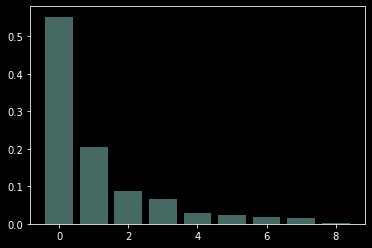

open      high       low     close    volume      ^IRX  \
Date                                                                     
2004-01-12 -0.120153 -0.528388 -0.452582 -0.629141 -0.342062 -0.466469   
2004-01-13 -0.714922 -0.726471 -0.914386 -0.869823  0.192851 -0.329493   
2004-01-14 -0.725758 -0.662623 -0.628504 -0.567227 -0.388900 -0.240142   
2004-01-15 -0.916525 -0.847553 -0.671207 -0.679305  0.001112  0.041001   
2004-01-16 -0.386863 -0.246184 -0.123467  0.094207 -0.079321  0.171866   

                ^TNX      ^TYX      CL=F      GC=F  ...       !low  \
Date                                                ...              
2004-01-12 -1.392773 -1.033310  0.435246  0.041484  ...  27.350000   
2004-01-13 -1.157240 -0.840195  0.329627 -0.031105  ...  27.260000   
2004-01-14 -1.221140 -1.042063  0.406992 -0.111722  ...  27.469999   
2004-01-15 -1.310265 -1.136896 -0.324938 -1.254553  ...  27.420000   
2004-01-16 -0.312540 -0.435947  0.338026 -1.556215  ...  27.530001   

            macro_pca*_0  macro_pca*_1  macro_pca*_2  macro_pca*_3  \
Date                                                                 
2004-01-12     -0.662072     -0.134483     -1.082526      0.816566   
2004-01-13     -0.514847     -0.055284     -0.794458      1.003119   
2004-01-14     -0.431303     -0.134216     -1.158065      0.530706   
2004-01-15     -0.143277     -0.392742     -1.850687     -1.070095   
2004-01-16      0.079347     -0.501595     -0.868287     -2.180506   

            macro_pca*_4  macro_pca*_5  macro_pca*_6  macro_pca*_7  \
Date                                                                 
2004-01-12     -1.161830     -0.122968     -0.483150      0.074078   
2004-01-13     -0.913299      0.017804     -0.584189     -0.369166   
2004-01-14     -0.937072     -0.301053     -0.511136      0.125971   
2004-01-15     -0.681364     -0.320906     -0.850731     -0.014047   
2004-01-16     -0.397258     -1.590654     -0.681522     -0.200139   

            macro_pca_8  
Date                     
2004-01-12     0.241825  
2004-01-13     0.175625  
2004-01-14     0.122978  
2004-01-15     0.190492  
2004-01-16     0.012751  

[5 rows x 28 columns]

In [13]:
macro_features = close_cols
df_train_norm, df_val_norm, df_test_norm = add_PCA(macro_features, df_train_norm, df_val_norm, df_test_norm, n_components=None, prefix='macro_', append=True)
df_train_norm.head()

(3353, 28)
(3353, 5) Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
(3353, 5)
[0.78123524 0.17541117 0.0297492  0.00903724 0.00456715]


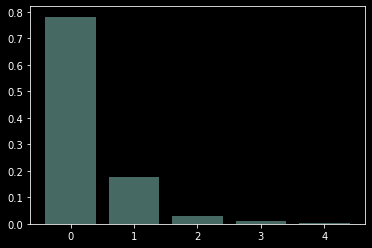

open      high       low     close    volume      ^IRX  \
Date                                                                     
2004-01-12 -0.120153 -0.528388 -0.452582 -0.629141 -0.342062 -0.466469   
2004-01-13 -0.714922 -0.726471 -0.914386 -0.869823  0.192851 -0.329493   
2004-01-14 -0.725758 -0.662623 -0.628504 -0.567227 -0.388900 -0.240142   
2004-01-15 -0.916525 -0.847553 -0.671207 -0.679305  0.001112  0.041001   
2004-01-16 -0.386863 -0.246184 -0.123467  0.094207 -0.079321  0.171866   

                ^TNX      ^TYX      CL=F      GC=F  ...  macro_pca*_4  \
Date                                                ...                 
2004-01-12 -1.392773 -1.033310  0.435246  0.041484  ...     -1.161830   
2004-01-13 -1.157240 -0.840195  0.329627 -0.031105  ...     -0.913299   
2004-01-14 -1.221140 -1.042063  0.406992 -0.111722  ...     -0.937072   
2004-01-15 -1.310265 -1.136896 -0.324938 -1.254553  ...     -0.681364   
2004-01-16 -0.312540 -0.435947  0.338026 -1.556215  ...     -0.397258   

            macro_pca*_5  macro_pca*_6  macro_pca*_7  macro_pca_8  \
Date                                                                
2004-01-12     -0.122968     -0.483150      0.074078     0.241825   
2004-01-13      0.017804     -0.584189     -0.369166     0.175625   
2004-01-14     -0.301053     -0.511136      0.125971     0.122978   
2004-01-15     -0.320906     -0.850731     -0.014047     0.190492   
2004-01-16     -1.590654     -0.681522     -0.200139     0.012751   

            tech_pca*_0  tech_pca*_1  tech_pca*_2  tech_pca_3  tech_pca_4  
Date                                                                       
2004-01-12     0.824291    -0.425218    -0.353142    0.022849   -0.094047  
2004-01-13     1.582643     0.117921    -0.099223    0.095793    0.008014  
2004-01-14     1.247297    -0.471746     0.123357    0.018303    0.022490  
2004-01-15     1.517749    -0.107055     0.166233   -0.148742    0.057119  
2004-01-16     0.292219    -0.152375     0.338416   -0.090998   -0.043069  

[5 rows x 33 columns]

In [14]:
PCA_col = [col for col in df.columns if '!' not in col and 'Y_' not in col and col not in macro_features]
df_train_norm, df_val_norm, df_test_norm = add_PCA(PCA_col, df_train_norm, df_val_norm, df_test_norm, prefix='tech_', append=True)
# add_PCA(PCA_col, df_train_pca, df_val_pca, df_test_pca, append=False)
df_train_norm.head()

In [15]:
df_train_norm['Y_reg'] = df_train_norm['close'].shift(-1)
df_train_norm.loc[df_train_norm.index[-1], 'Y_reg'] = df_val_norm.loc[df_val_norm.index[0], 'close']

df_val_norm['Y_reg'] = df_val_norm['close'].shift(-1)
df_val_norm.loc[df_val_norm.index[-1], 'Y_reg'] = df_test_norm.loc[df_test_norm.index[0], 'close']

df_test_norm['Y_reg'] = df_test_norm['close'].shift(-1)
df_test_norm.dropna(inplace=True)

In [16]:
df_test_norm.isna().sum()

open            0
high            0
low             0
close           0
volume          0
^IRX            0
^TNX            0
^TYX            0
CL=F            0
GC=F            0
CAD=X           0
JPY=X           0
EUR=X           0
CNY=X           0
!close_pct      0
!open           0
!close          0
!high           0
!low            0
macro_pca*_0    0
macro_pca*_1    0
macro_pca*_2    0
macro_pca*_3    0
macro_pca*_4    0
macro_pca*_5    0
macro_pca*_6    0
macro_pca*_7    0
macro_pca_8     0
tech_pca*_0     0
tech_pca*_1     0
tech_pca*_2     0
tech_pca_3      0
tech_pca_4      0
Y_reg           0
dtype: int64

In [94]:
import pickle

df_train_norm.to_csv(f'data/processed/macro/{ticker}_macro_train.csv')
df_val_norm.to_csv(f'data/processed/macro/{ticker}_macro_val.csv')
df_test_norm.to_csv(f'data/processed/macro/{ticker}_macro_test.csv')
with open(f'data/processed/macro/{ticker}_scalers.pickle', mode='wb',) as f: pickle.dump(scalers, f, protocol=pickle.HIGHEST_PROTOCOL)